In [450]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [388]:
pi = [0.2,0.5,0.3]

u1 = [0,0]
sigma1 = [[1,0],[0,1]]

u2 = [3,0]
sigma2 = [[1,0],[0,1]]

u3 = [0,3]
sigma3 = [[1,0],[0,1]]

options = [1,2,3]

In [389]:
obs = np.zeros([500,2])
for i in range(500):
    random = np.random.choice(options,p=pi)
    if random == 1:
        obs[i] = np.random.multivariate_normal(u1,sigma1)
    elif random == 2:
        obs[i] = np.random.multivariate_normal(u2,sigma2)
    else:
        obs[i] = np.random.multivariate_normal(u3,sigma3)
    

In [390]:
def kmeans(k):
    kmean = np.random.random([k,2])
    c = np.zeros(500)
    l = np.zeros(20)
    for i in range(20):
        #print i
        nk = np.zeros(k)
        nksum = np.zeros([k,2])
        for j in range(500):
            mini = 999999
            ctemp = 1
            for cluster in range(k):
                dist = (np.linalg.norm(obs[j] - kmean[cluster],ord=2))**2
                if dist<mini:
                    mini = dist
                    ctemp = cluster + 1       
            c[j] = ctemp
            nk[ctemp-1] = 1 + nk[ctemp-1]
            nksum[ctemp-1] = nksum[ctemp-1] + obs[j]
        for cluster in range(k):
            kmean[cluster] = nksum[cluster]/nk[cluster]
        for m in range(500):
            for n in range(k):
                if c[m] == n+1:
                    l[i] = l[i] + (np.linalg.norm(obs[m] - kmean[n],ord=2))**2
    return c,l
            

In [391]:
c2,l2 = kmeans(2)
c3,l3 = kmeans(3)
c4,l4 = kmeans(4)
c5,l5 = kmeans(5)

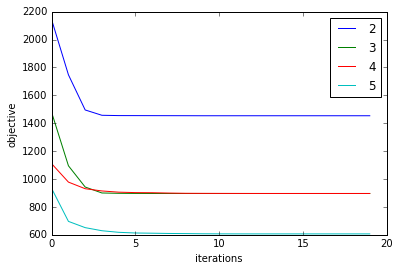

In [451]:
plt.plot(range(20),l2,label=2)
plt.plot(range(20),l3,label=3)
plt.plot(range(20),l4,label = 4)
plt.plot(range(20),l5,label = 5)
plt.xlabel("iterations")
plt.ylabel("objective")
plt.legend()

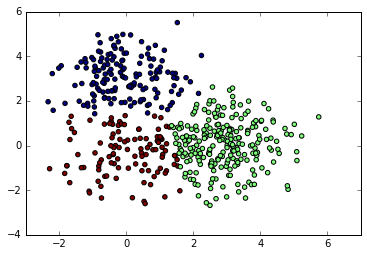

In [402]:
plt.scatter(obs[:,0],obs[:,1],c=c3,label=c3)

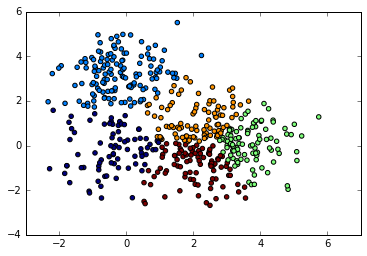

In [452]:
plt.scatter(obs[:,0],obs[:,1],c=c5,label=c5)

In [323]:
train = np.loadtxt("ratings.csv",delimiter=',')

In [324]:
n1 = 943
n2 = 1682
d = 10

In [325]:
V = np.zeros([d,n2])
for i in range(n2):
    V[:,i] = np.random.multivariate_normal(mean = np.zeros(d),cov = np.eye(d))

In [326]:
U = np.zeros([n1,d])

In [327]:
M = np.zeros([n1,n2])
for i in range(len(train)):
    M[int(train[i,0])-1,int(train[i,1])-1] = train[i,2]

In [328]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [329]:
test = np.loadtxt("ratings_test.csv",delimiter=',')

In [330]:
rmseval = np.zeros(10)

In [331]:
Ubest = np.zeros([n1,d])
Vbest = np.zeros([d,n2])

In [332]:
minval = -99999999999999999999999999

In [333]:
omegau = {}
omegav = {}
for i in range(n1):
    omegau[i] = []
for j in range(n2):
    omegav[j] = []
    
for i in range(n1):
    for j in range(n2):
        if M[i,j]!=0:
            omegau[i].append(j)
            omegav[j].append(i)

In [266]:
V = np.zeros([d,n2])
for i in range(n2):
    V[:,i] = np.random.multivariate_normal(mean = np.zeros(d),cov = np.eye(d))
U = np.zeros([n1,d])
for i in range(n1):
    U[i] = np.random.multivariate_normal(mean = np.zeros(d),cov = np.eye(d))
ll = np.zeros(100)
for x in range(100):
    for i in range(n1):
        sum = np.zeros([d,d])
        sum2 = np.zeros([d,1])
        for j in omegau[i]:
            sum = sum + np.dot(V[:,j].reshape(d,1),V[:,j].reshape(d,1).T)
            sum2 = sum2 + M[i,j] * V[:,j].reshape(d,1)
        sum = sum + 0.25 * np.eye(sum.shape[0])
        U[i] = np.dot(np.linalg.inv(sum),sum2).reshape(d,)
    for i in range(n2):
        sum = np.zeros([d,d])
        sum2 = np.zeros([d,1])
        for j in omegav[i]:
            sum = sum + np.dot(U[j].reshape(d,1),U[j].reshape(1,d))
            sum2 = sum2 + M[j,i] * U[j].reshape(d,1)
        sum = sum + 0.25 * np.eye(sum.shape[0])
        V[:,i] = np.dot(np.linalg.inv(sum),sum2).reshape(d,)
    Usum = 0
    Vsum = 0 
    loglikehood = 0
    for i in range(n1):
        Usum = Usum + np.linalg.norm(U[i],ord=2)**2 * 0.5
        for j in range(n2):
            if int(M[i,j])!=0:
                loglikehood = loglikehood + np.linalg.norm(M[i,j]-np.dot(U[i],V[:,j].reshape(d,1)),ord=2)**2 * 0.5/0.25
    for j in range(n2):
        Vsum = Vsum + np.linalg.norm(V[:,j],ord=2)**2 * 0.5
    loglikehood = -(loglikehood + Usum + Vsum)
    ll[x] = loglikehood

In [334]:
llhood = np.zeros([10,100])
for oi in range(10):
    V = np.zeros([d,n2])
    for i in range(n2):
        V[:,i] = np.random.multivariate_normal(mean = np.zeros(d),cov = np.eye(d))
    U = np.zeros([n1,d])
    for i in range(n1):
        U[i] = np.random.multivariate_normal(mean = np.zeros(d),cov = np.eye(d))
    ll = np.zeros(100)
    for x in range(100):
        for i in range(n1):
            sum = np.zeros([d,d])
            sum2 = np.zeros([d,1])
            for j in omegau[i]:
                sum = sum + np.dot(V[:,j].reshape(d,1),V[:,j].reshape(d,1).T)
                sum2 = sum2 + M[i,j] * V[:,j].reshape(d,1)
            sum = sum + 0.25 * np.eye(sum.shape[0])
            U[i] = np.dot(np.linalg.inv(sum),sum2).reshape(d,)
        for i in range(n2):
            sum = np.zeros([d,d])
            sum2 = np.zeros([d,1])
            for j in omegav[i]:
                sum = sum + np.dot(U[j].reshape(d,1),U[j].reshape(1,d))
                sum2 = sum2 + M[j,i] * U[j].reshape(d,1)
            sum = sum + 0.25 * np.eye(sum.shape[0])
            V[:,i] = np.dot(np.linalg.inv(sum),sum2).reshape(d,)
        Usum = 0
        Vsum = 0 
        loglikehood = 0
        for i in range(n1):
            Usum = Usum + np.linalg.norm(U[i],ord=2)**2 * 0.5
            for j in range(n2):
                if M[i,j]!=0:
                    loglikehood = loglikehood + np.linalg.norm(M[i,j]-np.dot(U[i],V[:,j].reshape(d,1)),ord=2)**2 * 0.5/0.25
        for j in range(n2):
            Vsum = Vsum + np.linalg.norm(V[:,j],ord=2)**2 * 0.5
        loglikehood = -(loglikehood + Usum + Vsum)
        ll[x] = loglikehood
    llhood[oi] = ll
    if np.max(ll)>minval:
        minval = np.max(ll)
        Ubest = U
        Vbest = V
    test_pred = np.zeros(len(test))
    for i in range(len(test)):
        test_pred[i] = np.dot((U[int(test[i,0]-1)]),(V[:,int(test[i,1]-1)].reshape(d,1)))
    rmseval[oi] = rmse(test_pred,test[:,2])
    
        

In [439]:
%matplotlib notebook

<IPython.core.display.Javascript object>


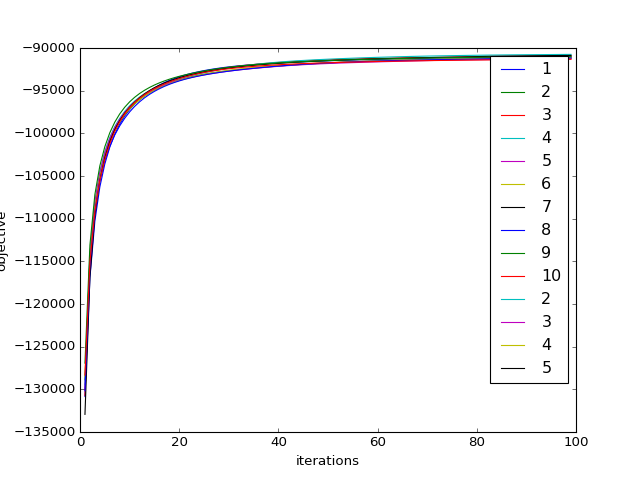

In [442]:
for i in range(10):
    plt.plot(range(1,100),llhood[i,1:],label=i+1)
plt.xlabel("iterations")
plt.ylabel("objective")

plt.legend()

In [337]:
import pandas as pd
table = pd.DataFrame(data={'iterations':range(1,11),'objective':llhood[:,99],'rmse':rmseval})

In [338]:
table.sort(columns='objective',ascending=False)

C:\Users\vijay\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,iterations,objective,rmse
3,4,-90749.493202,1.127497
6,7,-90870.972507,1.122839
2,3,-90941.266455,1.119334
8,9,-90996.956857,1.102875
0,1,-91048.209689,1.138750
5,6,-91144.803130,1.096203
7,8,-91159.902285,1.105659
1,2,-91173.767354,1.121936
4,5,-91228.300827,1.107579
9,10,-91328.872955,1.117422


In [339]:
movies = np.loadtxt("movies.txt",delimiter='\t',dtype=str)

In [340]:
moviesdf = pd.DataFrame({'index':range(1682),'title':movies})

In [416]:
ind1 = int(moviesdf[moviesdf['title']=='Star Wars (1977)']['index'])
ind2 = int(moviesdf[moviesdf['title']=='My Fair Lady (1964)']['index'])
ind3 = int(moviesdf[moviesdf['title']=='GoodFellas (1990)']['index'])

In [417]:
def find10closest(index):
    tenbest = np.zeros([10,2])
    tenbest[:,0] = range(10)
    for i in range(10):
        tenbest[i,1] = distance(i,index)
    for i in range(10,n2):
        if distance(i,index)<np.max(tenbest[:,1]) and i!=index:
            tenbest[tenbest[:,1]==np.max(tenbest[:,1])] = [i,distance(i,index)]
    return tenbest

In [418]:
def distance(i1,i2):
    return np.linalg.norm(V[:,i1] - V[:,i2],ord=2)**2

In [419]:
tenbest1 = find10closest(ind1)
tenbest2 = find10closest(ind2)
tenbest3 = find10closest(ind3)

In [420]:
tenbest3

array([[  6.53000000e+02,   9.66889949e-01],
       [  5.50000000e+01,   8.35369602e-01],
       [  1.26000000e+02,   7.84602816e-01],
       [  5.03000000e+02,   5.26535166e-01],
       [  1.87000000e+02,   6.41023350e-01],
       [  4.68000000e+02,   7.85341048e-01],
       [  1.86000000e+02,   5.86664800e-01],
       [  1.06900000e+03,   6.72885957e-01],
       [  1.79000000e+02,   7.70237993e-01],
       [  5.22000000e+02,   6.70196295e-01]])

In [421]:
movies1=[]
movies2=[]
movies3=[]
for i in range(10):
    movies1.append(movies[int(tenbest1[i,0])])
    movies2.append(movies[int(tenbest2[i,0])])
    movies3.append(movies[int(tenbest3[i,0])])

In [429]:
tenbest1df = pd.DataFrame(tenbest1)
tenbest2df = pd.DataFrame(tenbest2)
tenbest3df = pd.DataFrame(tenbest3)

In [432]:
tenbest1df['title'] = movies1
tenbest2df['title'] = movies2
tenbest3df['title'] = movies3

In [436]:
tenbest1df.columns = ['index','distance','title']
tenbest2df.columns = ['index','distance','title']
tenbest3df.columns = ['index','distance','title']

In [445]:
tenbest1df['query'] = 'Star Wars'
tenbest2df['query'] = 'My Fair Lady'
tenbest3df['query'] = 'Goodfellas'

In [448]:
tenbest3df

,index,distance,title,query
0,653.0,0.966890,Chinatown (1974),Goodfellas
1,55.0,0.835370,Pulp Fiction (1994),Goodfellas
2,126.0,0.784603,"Godfather, The (1972)",Goodfellas
3,503.0,0.526535,Bonnie and Clyde (1967),Goodfellas
4,187.0,0.641023,Full Metal Jacket (1987),Goodfellas
5,468.0,0.785341,Short Cuts (1993),Goodfellas
6,186.0,0.586665,"Godfather: Part II, The (1974)",Goodfellas
7,1069.0,0.672886,Living in Oblivion (1995),Goodfellas
8,179.0,0.770238,Apocalypse Now (1979),Goodfellas
9,522.0,0.670196,Cool Hand Luke (1967),Goodfellas
